1. PCA verilerini okuma

In [1]:
import pandas as pd

# PCA uygulanmış verileri oku
X_train_pca = pd.read_csv("dataset/train_pca.csv")
y_train_pca = pd.read_csv("dataset/y_train_pca.csv").values.ravel()

X_test_pca = pd.read_csv("dataset/test_pca.csv")
y_test_pca = pd.read_csv("dataset/y_test_pca.csv").values.ravel()

# Boyut kontrolü
print("Eğitim verisi (PCA):", X_train_pca.shape)
print("Test verisi (PCA):", X_test_pca.shape)

Eğitim verisi (PCA): (398040, 12)
Test verisi (PCA): (85443, 12)


2. Naive Bayes modeli ile eğitim

In [2]:
from sklearn.naive_bayes import GaussianNB

# Model oluştur ve eğit
model_pca = GaussianNB()
model_pca.fit(X_train_pca, y_train_pca)

# Tahminler
y_pred_pca = model_pca.predict(X_test_pca)
y_proba_pca = model_pca.predict_proba(X_test_pca)[:, 1]

3. Naive Bayes model eğitimi ve değerlendirme

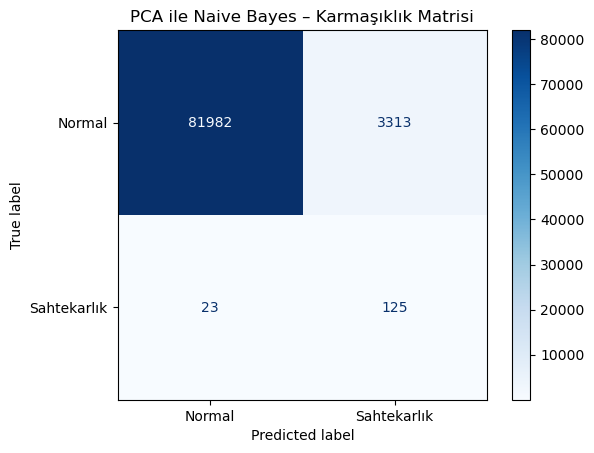

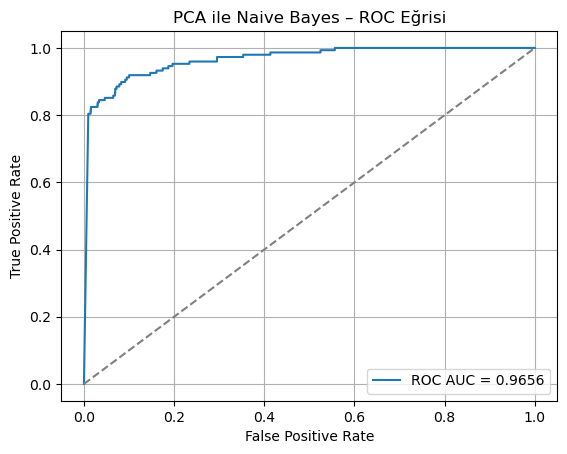

Doğruluk (Accuracy):     0.9610
Kesinlik (Precision):    0.0364
Duyarlılık (Recall):     0.8446
Özgüllük (Specificity):  0.9612
F1 Skoru:                0.0697
ROC AUC Skoru:           0.9656


In [4]:
from sklearn.metrics import (
    confusion_matrix, 
    ConfusionMatrixDisplay,
    classification_report, 
    accuracy_score, 
    precision_score,
    recall_score, 
    f1_score, 
    roc_auc_score, 
    roc_curve
)
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_test_pca, y_pred_pca)
ConfusionMatrixDisplay(cm, display_labels=["Normal", "Sahtekarlık"]).plot(cmap="Blues")
plt.title("PCA ile Naive Bayes – Karmaşıklık Matrisi")
plt.show()

# ROC Eğrisi
fpr, tpr, thresholds = roc_curve(y_test_pca, y_proba_pca)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc_score(y_test_pca, y_proba_pca):.4f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("PCA ile Naive Bayes – ROC Eğrisi")
plt.legend()
plt.grid()
plt.show()

# Performans metrikleri
accuracy = accuracy_score(y_test_pca, y_pred_pca)
precision = precision_score(y_test_pca, y_pred_pca)
recall = recall_score(y_test_pca, y_pred_pca)
f1 = f1_score(y_test_pca, y_pred_pca)
roc_auc = roc_auc_score(y_test_pca, y_proba_pca)
specificity = cm[0,0] / (cm[0,0] + cm[0,1])

# Metrikleri yazdır
print(f"Doğruluk (Accuracy):     {accuracy:.4f}")
print(f"Kesinlik (Precision):    {precision:.4f}")
print(f"Duyarlılık (Recall):     {recall:.4f}")
print(f"Özgüllük (Specificity):  {specificity:.4f}")
print(f"F1 Skoru:                {f1:.4f}")
print(f"ROC AUC Skoru:           {roc_auc:.4f}")

## Naive Bayes Modeli Performans Karşılaştırması

Aşağıdaki tabloda, Naive Bayes modelinin orijinal öznitelikler ile eğitildiği durum ve PCA (Principal Component Analysis) ile boyutu azaltılmış verilerle eğitildiği durum karşılaştırılmıştır.

| Metrik              | Orijinal Veri | PCA Sonrası  |
|---------------------|----------------|---------------|
| Doğruluk (Accuracy) | 0.9762         | 0.9610        |
| Kesinlik (Precision)| 0.0577         | 0.0364        |
| Duyarlılık (Recall) | 0.8311         | 0.8446        |
| Özgüllük (Specificity)| 0.9764       | 0.9612        |
| F1 Skoru            | 0.1078         | 0.0697        |
| ROC AUC Skoru       | 0.9539         | 0.9656        |

### Yorum:
- PCA sonrası modelin **duyarlılığı (recall)** ve **ROC AUC** değeri artarken, **kesinlik (precision)** ve **F1 skoru** azalmıştır.
- Bu durum, modelin daha fazla sahtekarlık vakasını tespit ettiğini (pozitif sınıflar) ancak aynı zamanda daha fazla **yanlış pozitif** ürettiğini göstermektedir.
- **ROC AUC skorunun artması**, PCA'nın veri ayrıştırma gücünü artırdığına işaret etmektedir.
- Bu bağlamda, boyut indirimi sahtekârlık tespiti problemlerinde daha fazla duyarlılık isteyen sistemler için avantaj sağlayabilir.